In [53]:
import numpy as np 
import pandas as pd 
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
import seaborn as sns 
sns.set()
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
carprice = pd.read_csv('Car Price.csv')

In [3]:
carprice.head(10)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
5,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0
6,ciaz,2015,6.75,8.12,18796,Petrol,Dealer,Manual,0
7,s cross,2015,6.50,8.61,33429,Diesel,Dealer,Manual,0
8,ciaz,2016,8.75,8.89,20273,Diesel,Dealer,Manual,0
9,ciaz,2015,7.45,8.92,42367,Diesel,Dealer,Manual,0


In [4]:
carprice.tail(10)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
291,brio,2015,5.40,6.10,31427,Petrol,Dealer,Manual,0
292,jazz,2016,6.40,8.40,12000,Petrol,Dealer,Manual,0
293,city,2010,3.25,9.90,38000,Petrol,Dealer,Manual,0
294,amaze,2014,3.75,6.80,33019,Petrol,Dealer,Manual,0
295,city,2015,8.55,13.09,60076,Diesel,Dealer,Manual,0
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.90,5464,Petrol,Dealer,Manual,0


In [5]:
carprice.sample(5)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
206,xcent,2017,5.75,7.13,12479,Petrol,Dealer,Manual,0
208,i20,2017,7.90,8.10,3435,Petrol,Dealer,Manual,0
184,Bajaj Pulsar 150,2008,0.25,0.75,26000,Petrol,Individual,Manual,1
250,creta,2016,12.90,13.60,35934,Diesel,Dealer,Manual,0
126,Bajaj Avenger 220,2017,0.90,0.95,1300,Petrol,Individual,Manual,0


In [6]:
carprice.dtypes

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Kms_Driven         int64
Fuel_Type         object
Seller_Type       object
Transmission      object
Owner              int64
dtype: object

In [7]:
carprice.shape

(301, 9)

In [8]:
carprice.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [9]:
carprice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [10]:
carprice.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [12]:
carprice=pd.DataFrame(data=carprice)

In [13]:
carprice

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [14]:
carprice.isnull()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
296,False,False,False,False,False,False,False,False,False
297,False,False,False,False,False,False,False,False,False
298,False,False,False,False,False,False,False,False,False
299,False,False,False,False,False,False,False,False,False


In [15]:
carprice.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

<AxesSubplot:xlabel='Year', ylabel='Density'>

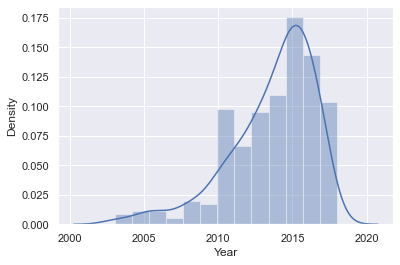

In [17]:
sns.distplot(carprice['Year'])

<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

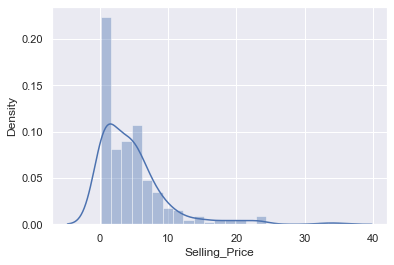

In [18]:
sns.distplot(carprice['Selling_Price'])

<AxesSubplot:xlabel='Present_Price', ylabel='Density'>

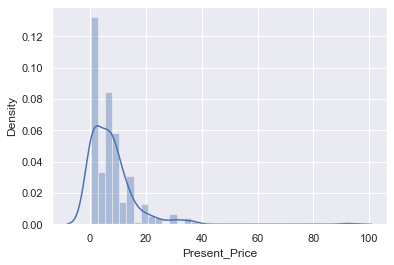

In [19]:
sns.distplot(carprice['Present_Price'])

<AxesSubplot:xlabel='Kms_Driven', ylabel='Density'>

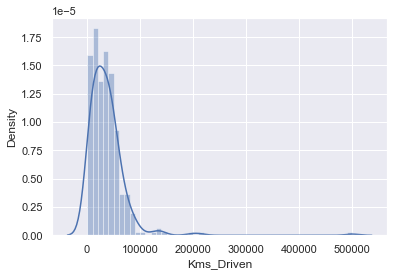

In [20]:
sns.distplot(carprice['Kms_Driven'])

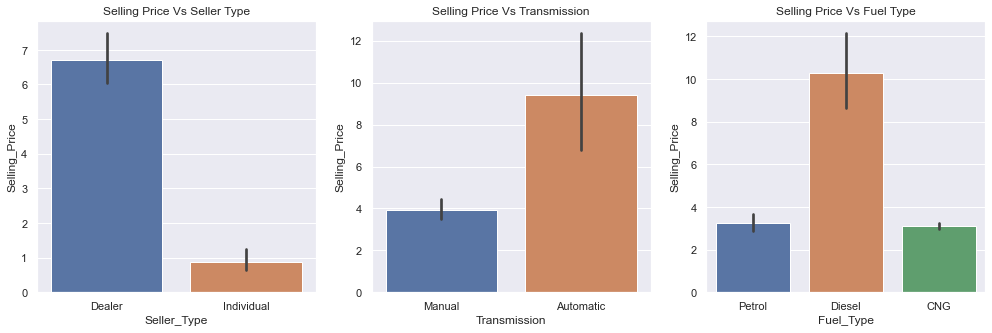

In [22]:
plt.figure(figsize=[17,5])
plt.subplot(1,3,1)
sns.barplot(carprice['Seller_Type'], carprice['Selling_Price'])
plt.title('Selling Price Vs Seller Type')

plt.subplot(1,3,2)
sns.barplot(carprice['Transmission'],carprice['Selling_Price'])
plt.title('Selling Price Vs Transmission')

plt.subplot(1,3,3)
sns.barplot(carprice['Fuel_Type'],carprice['Selling_Price'])
plt.title('Selling Price Vs Fuel Type')

plt.show()

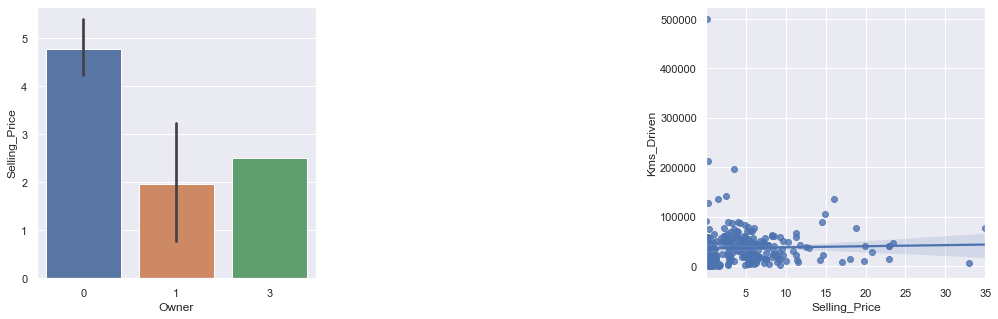

In [25]:
plt.figure(figsize=[17,5])
plt.subplot(1,3,1)
sns.barplot(carprice['Owner'],carprice['Selling_Price'])
plt.subplot(1,3,3)
sns.regplot(carprice['Selling_Price'],carprice['Kms_Driven'])
plt.show()

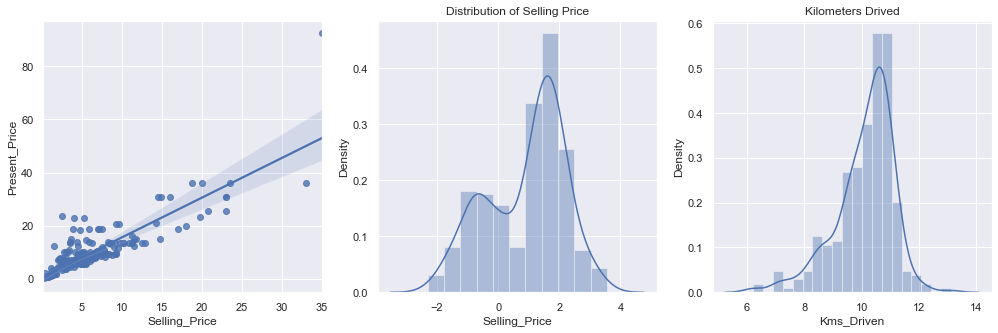

In [26]:
plt.figure(figsize=[17,5])
plt.subplot(1,3,1)
sns.regplot(carprice['Selling_Price'],carprice['Present_Price'])

plt.subplot(1,3,2)
sns.distplot(np.log(carprice['Selling_Price']))
plt.title('Distribution of Selling Price')


plt.subplot(1,3,3)
sns.distplot(np.log(carprice['Kms_Driven']))
plt.title('Distribution of KMS Drived')


plt.title('Kilometers Drived')
plt.show()

In [27]:
print(carprice['Fuel_Type'].unique())
print(carprice['Seller_Type'].unique())
print(carprice['Transmission'].unique())
print(carprice['Car_Name'].unique())

['Petrol' 'Diesel' 'CNG']
['Dealer' 'Individual']
['Manual' 'Automatic']
['ritz' 'sx4' 'ciaz' 'wagon r' 'swift' 'vitara brezza' 's cross'
 'alto 800' 'ertiga' 'dzire' 'alto k10' 'ignis' '800' 'baleno' 'omni'
 'fortuner' 'innova' 'corolla altis' 'etios cross' 'etios g' 'etios liva'
 'corolla' 'etios gd' 'camry' 'land cruiser' 'Royal Enfield Thunder 500'
 'UM Renegade Mojave' 'KTM RC200' 'Bajaj Dominar 400'
 'Royal Enfield Classic 350' 'KTM RC390' 'Hyosung GT250R'
 'Royal Enfield Thunder 350' 'KTM 390 Duke ' 'Mahindra Mojo XT300'
 'Bajaj Pulsar RS200' 'Royal Enfield Bullet 350'
 'Royal Enfield Classic 500' 'Bajaj Avenger 220' 'Bajaj Avenger 150'
 'Honda CB Hornet 160R' 'Yamaha FZ S V 2.0' 'Yamaha FZ 16'
 'TVS Apache RTR 160' 'Bajaj Pulsar 150' 'Honda CBR 150' 'Hero Extreme'
 'Bajaj Avenger 220 dtsi' 'Bajaj Avenger 150 street' 'Yamaha FZ  v 2.0'
 'Bajaj Pulsar  NS 200' 'Bajaj Pulsar 220 F' 'TVS Apache RTR 180'
 'Hero Passion X pro' 'Bajaj Pulsar NS 200' 'Yamaha Fazer '
 'Honda Activa 4G' 

In [28]:
carprice = carprice.drop(labels='Car_Name', axis=1)

In [29]:
clean_data = pd.get_dummies(carprice,drop_first=True)
clean_data.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,2014,3.35,5.59,27000,0,0,1,0,1
1,2013,4.75,9.54,43000,0,1,0,0,1
2,2017,7.25,9.85,6900,0,0,1,0,1
3,2011,2.85,4.15,5200,0,0,1,0,1
4,2014,4.60,6.87,42450,0,1,0,0,1


In [30]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = clean_data[['Present_Price','Kms_Driven','Owner','Fuel_Type_Diesel',
                        'Fuel_Type_Petrol','Seller_Type_Individual','Transmission_Manual']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns
vif

,VIF,Features
0,3.176656,Present_Price
1,2.021693,Kms_Driven
2,1.065951,Owner
3,4.510797,Fuel_Type_Diesel
4,11.538497,Fuel_Type_Petrol
5,2.220313,Seller_Type_Individual
6,8.164862,Transmission_Manual


In [31]:
data_no_multicolinearity = clean_data.drop(['Kms_Driven','Fuel_Type_Petrol'],axis=1)

In [32]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = clean_data[['Present_Price','Owner','Fuel_Type_Diesel',
                        'Seller_Type_Individual','Transmission_Manual']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns
vif

,VIF,Features
0,1.996111,Present_Price
1,1.056677,Owner
2,1.651291,Fuel_Type_Diesel
3,1.715091,Seller_Type_Individual
4,2.291962,Transmission_Manual


<AxesSubplot:>

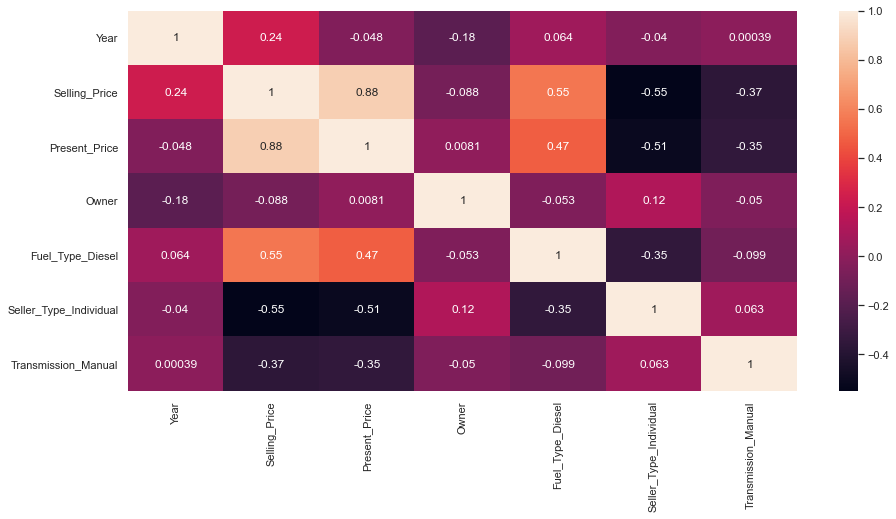

In [33]:
plt.figure(figsize=[15,7])
sns.heatmap(data_no_multicolinearity.corr(), annot=True)

In [34]:
from sklearn.feature_selection import f_regression,SelectKBest

X = data_no_multicolinearity.drop('Selling_Price',axis=1)
y = data_no_multicolinearity['Selling_Price']

f_regression(X,y)

p_values = f_regression(X,y)[1]

p_values.round(3)

array([0.   , 0.   , 0.126, 0.   , 0.   , 0.   ])

In [37]:
model_summry = pd.DataFrame(data=['Present_Price', 'Owner', 'Year', 'Fuel_Type_Diesel',
                              'Seller_Type_Individual', 'Transmission_Manual'], columns=['Features'])
model_summry['p-values'] = p_values.round(3)
model_summry.head()

,Features,p-values
0,Present_Price,0.000
1,Owner,0.000
2,Year,0.126
3,Fuel_Type_Diesel,0.000
4,Seller_Type_Individual,0.000


In [40]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

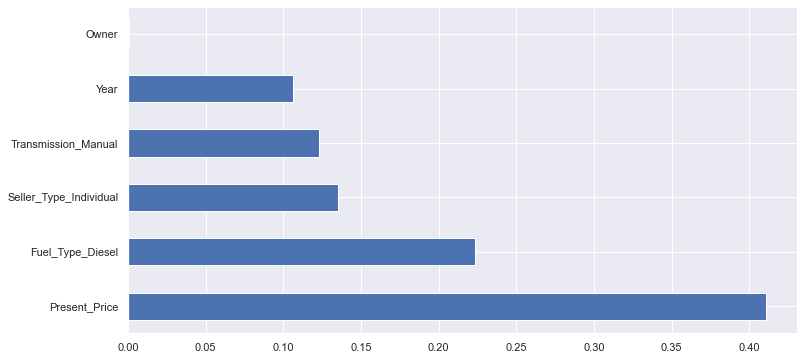

In [41]:
plt.figure(figsize=[12,6])
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(6).plot(kind='barh')
plt.show()

In [42]:
print(feat_importances.sort_values(ascending=False))

Present_Price             0.410476
Fuel_Type_Diesel          0.223630
Seller_Type_Individual    0.135542
Transmission_Manual       0.122875
Year                      0.106579
Owner                     0.000899
dtype: float64


In [43]:
data_no_multicolinearity.columns

Index(['Year', 'Selling_Price', 'Present_Price', 'Owner', 'Fuel_Type_Diesel',
       'Seller_Type_Individual', 'Transmission_Manual'],
      dtype='object')

In [44]:
final_df = data_no_multicolinearity[['Selling_Price', 'Present_Price',
       'Fuel_Type_Diesel', 'Seller_Type_Individual', 'Transmission_Manual']]

In [45]:
final_df.head()

,Selling_Price,Present_Price,Fuel_Type_Diesel,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,0,0,1
1,4.75,9.54,1,0,1
2,7.25,9.85,0,0,1
3,2.85,4.15,0,0,1
4,4.60,6.87,1,0,1


In [46]:
X = final_df.drop('Selling_Price', axis=1)
y = final_df['Selling_Price']

In [48]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X[['Present_Price']])

StandardScaler()

In [49]:
input_scaled = scaler.transform(X[['Present_Price']])
scaled_data = pd.DataFrame(input_scaled, columns=['Present_Price'])

In [50]:
X_scaled =scaled_data.join(X.drop(['Present_Price'],axis=1))

In [51]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2, random_state=365)

In [54]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()


lr.fit(x_train,y_train)


y_pred_lr = lr.predict(x_test)

r_squared = r2_score(y_test,y_pred_lr)
rmse = np.sqrt(mean_squared_error(y_test,y_pred_lr))
print("R_squared :",r_squared)

R_squared : 0.7703317276495821


In [62]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()


rf.fit(x_train,y_train)


y_pred_rf = rf.predict(x_test)

r_squared = r2_score(y_test,y_pred_rf)
rmse = np.sqrt(mean_squared_error(y_test,y_pred_rf))
print("R_squared :",r_squared)

R_squared : 0.778292195767766


In [55]:
from sklearn.ensemble import GradientBoostingRegressor
gbt = GradientBoostingRegressor()


gbt.fit(x_train,y_train)


y_pred_gbt = gbt.predict(x_test)

r_squared = r2_score(y_test,y_pred_gbt)
rmse = np.sqrt(mean_squared_error(y_test,y_pred_gbt))
print("R_squared :",r_squared)

R_squared : 0.7433223454396836


In [56]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [63]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)


In [64]:
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   0.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, verbose=2)

In [65]:
rf_random.best_params_

{'n_estimators': 1100,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 15}

In [66]:
predictions=rf_random.predict(x_test)

In [67]:
r_squared = r2_score(y_test,predictions)
rmse = np.sqrt(mean_squared_error(y_test,predictions))
print("R_squared :",r_squared)

R_squared : 0.7321981215240407
